# Planificación del proyecto

# Entendimiento del negocio

# Comprensión de los datos


Columnas de inicio:
* **TL** : cuadrado superior izquierdo {x,o,b}
* **TM** : cuadrado superior central {x,o,b}
* **TR** : cuadrado superior derecho {x,o,b}
* **ML** : cuadrado central izquierdo {x,o,b}
* **MM** : cuadrado central medio {x,o,b}
* **MR** : cuadrado medio derecho {x,o,b}
* **BL** : cuadrado inferior izquierdo {x,o,b}
* **BM** : cuadrado medio inferior {x,o,b}
* **BR** : cuadrado inferior derecho {x,o,b}


Variable de salida:
* **Verdadero**: x ganó
* **Falso**: x ha perdido

Los valores son:
* **x** : x jugador
* **o** : o jugador
* **b** : campo en blanco

## Importar librerias

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score


## Cargar el dataset

In [2]:
#Obtenemos el csv asignado
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tictactoe/tic-tac-toe.csv


In [3]:
#Cargamos los datos dados en un csv
df = pd.read_csv('/kaggle/input/tictactoe/tic-tac-toe.csv')

#Visualizamos datos para comprobar que se ha cargado correctamente
df.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [4]:
y = df['class']
x = df.drop(['class'], axis=1)

# Análisis descriptivo

Como ya habíamos visto en la tabla anterior, todo son variables categoricas, no tenemos ninguna númerica y nuestra variable de salida es binaria.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


Comprobamos los valores nulos, en este caso no tenemos ninguno, perfecto.

In [6]:
df.isnull().sum()

TL       0
TM       0
TR       0
ML       0
MM       0
MR       0
BL       0
BM       0
BR       0
class    0
dtype: int64

In [7]:
y.shape

(958,)

In [8]:
x.shape

(958, 9)

# Preprocesamiento de datos

## Paso 1. Transformar las variables categoricas a númericas

In [9]:
LE = LabelEncoder()

y = LE.fit_transform(y)
for column in x:
    x[column] = LE.fit_transform(x[column])

## Paso 2. Reequilibrio de la variable de salida

In [10]:
def MostrarVariableDeSalida(dataset):
  fig = plt.figure(figsize = (8,5))
  dataset['class'].value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
  plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
  plt.show()

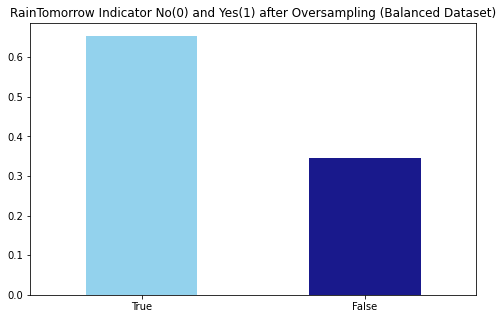

In [11]:
MostrarVariableDeSalida(df)

## Paso 3. Estandarización de los datos

Dividimos el dataset para entrenamiento y test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, train_size=0.7)

# Entrenamiento ML

## Random Forest Classifier

In [13]:
param_grid = { 
    'n_estimators': [25, 50, 100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=2, n_jobs=-1, verbose=1)

clf.fit(x_train, y_train)
print(clf.best_params_)
model = clf.best_estimator_
# Predecir en test
y_pred = model.predict(x_test)

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.4s


{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 25}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   37.8s finished


{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}

In [14]:
print(accuracy_score(y_test, y_pred)*100)

89.23611111111111
